In [9]:
import sys
import copy
import math
import networkx as nx
import matplotlib.pyplot as plt

23


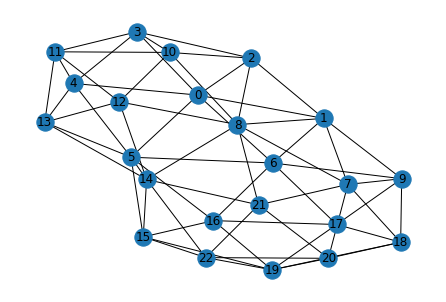

In [27]:
# Open the file and read the data
with open("input4.txt", "r") as f:
    data = f.readlines()
# Create the variables
neighbours = {}
variables = {}

# Process each line of data
for line in data:
    if line.startswith('#') or line.strip() == "":
        continue
    elif line.startswith('c'):
        colors = int(''.join(filter(str.isdigit, line)))
        continue
    # Split the line into two nodes
    node1, node2 = map(int, line.strip().split(","))
    # Update the neighbours
    if node1 not in neighbours:
        neighbours[node1] = []
    neighbours[node1].append(node2)
    if node2 not in neighbours:
        neighbours[node2] = []
    neighbours[node2].append(node1)
    # Update the variables
    if node1 not in variables:
        variables[node1] = [None, list(range(1, colors+1))]
    if node2 not in variables:
        variables[node2] = [None, list(range(1, colors+1))]
        
print(len(neighbours))

# Define the graph
G = nx.Graph()
for node, neighbours_list in neighbours.items():
    G.add_node(node)
    for neighbour in neighbours_list:
        G.add_edge(node, neighbour)
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [32]:
# Class definition of a state
class color:
    def __init__(self, curr, assigned, variables):
        self.curr = curr
        self.assigned = assigned
        self.variables = variables
    
    # Create a function to print the variables with their values
    def printvar(self):
        for var in self.variables:
            print(var,"has color", self.variables[var][0])
        # Define a color map
        colors_map = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 6: 'pink', 7: ' brown'}
        # Loop over the nodes and their assigned colors
        for node, (color, _) in self.variables.items():
            if color is not None:
                nx.set_node_attributes(G, {node: colors_map[color]}, 'color')
        # Draw the graph with node colors
        node_colors = nx.get_node_attributes(G, 'color')
        nx.draw(G, pos, with_labels=True, node_color=list(node_colors.values()))
        plt.show()    
###################################################################################################
# Find common elements between 2 lists
def intersection(a,b):
    a_set = set(a)
    b_set = set(b)
    # check length
    if len(a_set.intersection(b_set)) > 0:
        return(list(a_set.intersection(b_set)))
    else:
        return []
###################################################################################################
    
# Function that performs the backtracking search    
def backtrack_search(state):
    
    # Calculates the neighbours of the current node yet to be assigned
    not_assigned = {}
    temp = list(set(neighbours[state.curr]).difference(state.assigned))
    # Makes a dictionary with the unnassigned neighbours and their respective domain values
    for var in temp:
        if var in state.variables:
            not_assigned[var] = state.variables[var][1]
    
    # Finds states that are assigned and neighbours of the current state ( To find the values that satisfy the constraint)
    assigned_neighbours = intersection(neighbours[state.curr],state.assigned)
   

    # First find all possible values that can be assigned which satisfy the constraint
    possible_values = []
    for domain_val in state.variables[state.curr][1]:
        isAssign = True
        for assigned_var in assigned_neighbours:
            if domain_val == state.variables[assigned_var][0]:
                isAssign = False
                
        if isAssign:
            possible_values.append(domain_val)
            
    # Least Constraining Value - Choose the value that affects the values of its unnassigned neigbours the least
    if len(possible_values) > 0 :
        final_val = 0
        min_count = math.inf
        for val in possible_values:
            count = 0
            for neighbour_domain in not_assigned.values():
                count += neighbour_domain.count(val)
            if min_count > count:
                final_val = val
        
        state.variables[state.curr][0] = final_val
        state.variables[state.curr][1].remove(final_val)
        state.assigned.append(state.curr)
        
    else: # If possible values is empty, then no value can be assigned
        return #Backtrack
        
    if len(state.assigned) == len(neighbours):
        state.printvar()
        sys.exit("Solution Found")
        
    else:

        # Minimum Remaining Value - Chooses the variable with the least number of values in its domain
        
        # Sorts the neighbours based on their domain lengths
        sorted_items = sorted(not_assigned.items(), key=lambda x: len(x[1]))
        not_assigned.clear()
        not_assigned.update(sorted_items)
        
        # Chooses the variable with the smallest domain first
        for var in not_assigned:
            backtrack_search(color(copy.deepcopy(var),copy.deepcopy(state.assigned),copy.deepcopy(state.variables)))      

0 has color 3
1 has color 4
2 has color 2
3 has color 4
4 has color 2
5 has color 4
6 has color 2
7 has color 2
8 has color 1
9 has color 1
10 has color 3
11 has color 1
12 has color 4
13 has color 3
14 has color 2
15 has color 1
16 has color 3
17 has color 4
18 has color 3
19 has color 2
20 has color 1
21 has color 3
22 has color 4


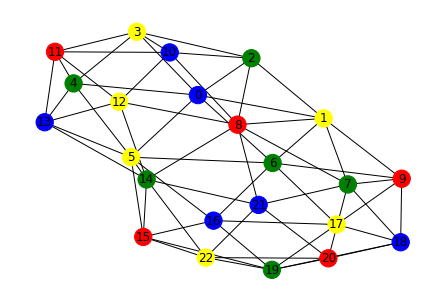

SystemExit: Solution Found

In [33]:
curr_state = color(1,[],copy.deepcopy(variables))
backtrack_search(curr_state)